# Tarea 7. Estimación del riesgo sistemático ($\beta$).

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea aplicarás la técnica aprendida en clase para la estimación del coeficiente de riesgo sistemático $\beta$, el cual es primordial en el modelo de valoración de activos en equilibrio CAPM.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea7_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Selección de activos (10 puntos)

Seleccionar cinco (5) activos de su preferencia y enunciarlos en una celda en formato Markdown.

Importaré: **Apple,  Pepsi, Microsoft, IBM y JP Morgan**

## 2. Descarga de datos (10 puntos)

Descargar los precios mensuales ajustados en el cierre para el índice S&P 500 (^GSPC) y para los activos seleccionados en los últimos tres años.

1. Graficar los precios (5 puntos).
2. Graficar los rendimientos (5 puntos).

In [2]:
# Importar paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [3]:
def get_adj_closes(tickers, start_date=None, end_date=None, freq='m'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval=freq).read()['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

<Figure size 720x576 with 0 Axes>

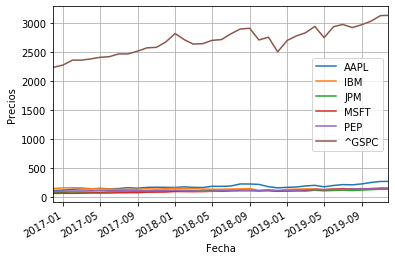

In [4]:
closes=get_adj_closes(['AAPL','MSFT','IBM','PEP','JPM','^GSPC'],'2016-11-11')
plt.figure(figsize=(10,8))
closes.plot()
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.grid()
plt.legend()
plt.show()

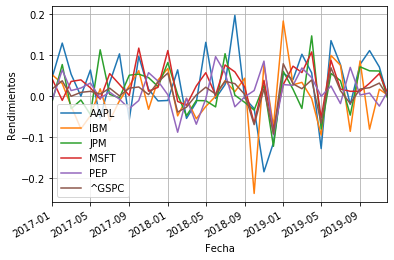

In [5]:
ret=closes.pct_change().dropna()
ret.plot()
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.grid()
plt.legend(loc='best')
plt.show()


In [6]:
ret.mean()

Symbols
AAPL     0.027764
IBM      0.000499
JPM      0.015759
MSFT     0.027635
PEP      0.010347
^GSPC    0.010016
dtype: float64

## 3. Calculando los coeficientes $\beta$ (50 puntos)

Usando los datos de rendimientos mensuales calculados en el punto anterior:

1. Estime el valor del coeficiente de riesgo sistemático $\beta$ para cada uno de los activos seleccionados, con el método visto en clase (5 puntos por cada activo).
2. Compare su estimación de $\beta$ con el valor reportado en Yahoo! Finance mediante el error relativo: 
$$e_{relativo}=\frac{\beta_{estimado}-\beta_{Yahoo!}}{\beta_{Yahoo!}}.$$
Concluya de acuerdo al valor del error relativo obtenido (5 puntos por cada activo).

In [7]:
cov = ret.cov()
cov
beta=[]
for i in range (len(cov.columns)-1):
  x=cov.iloc[i,-1]/cov.loc['^GSPC','^GSPC']
  beta.append(x)
beta=pd.DataFrame(beta,index=cov.columns[0:-1],columns=['Beta'])
beta

,Beta
Symbols,
AAPL,1.154436
IBM,1.536909
JPM,1.135599
MSFT,1.006404
PEP,0.462847


In [8]:
bYahoo=pd.DataFrame(index=beta.index, data={'Beta': [1.25,1.31,1.34,1.20,.57]})
bYahoo

,Beta
Symbols,
AAPL,1.25
IBM,1.31
JPM,1.34
MSFT,1.20
PEP,0.57


In [9]:
error=abs((beta-bYahoo)/bYahoo)
error

,Beta
Symbols,
AAPL,0.076451
IBM,0.173213
JPM,0.152538
MSFT,0.161330
PEP,0.187987


In [10]:
Er=pd.DataFrame(ret.mean(),index=beta.index,columns=['Ret'])
Er.mean()

Ret    0.016401
dtype: float64

Apple tiene el menor error relativo y Pepsi el mayor, esto podría tener que ver con la cantidad de datos wue tenemos para obtener nuestra beta.

## 4. Gráfico y conclusiones (30 puntos)

1. Grafique cada uno de los activos en el espacio de $E[r]$ (eje $y$) vs. $\beta$ (eje $x$) (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. De la ecuación obtenida, identifique el valor de la tasa libre de riesgo $r_f$, y el valor del rendimiento esperado del portafolio de mercado $E[r_M]$. Compare este último con el rendimiento esperado del índice S&P500 (10 puntos).

In [11]:
import scipy.optimize as opt

In [12]:
def objfun(b, Er, sigma):
    return((Er-(b[0]+b[1]*sigma))**2).sum()
bb=[0,1]

In [13]:
y=Er['Ret']
x=beta['Beta']
sol = opt.minimize(objfun,bb,args=(y,x))
b=sol.x
sol

      fun: 0.0005243697533566525
 hess_inv: array([[ 1.02671154, -0.87546647],
       [-0.87546647,  0.82699722]])
      jac: array([1.62952347e-07, 1.43627403e-08])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 0.02264612, -0.00589599])

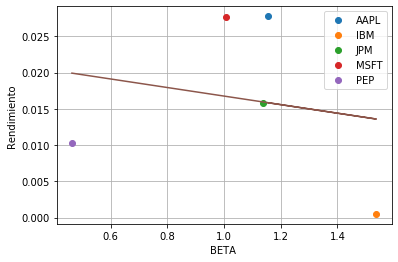

In [14]:
plt.figure(figsize=(6,4))
plt.plot(x[0],y[0],'o',label='AAPL')
plt.plot(x[1],y[1],'o',label='IBM')
plt.plot(x[2],y[2],'o',label='JPM')
plt.plot(x[3],y[3],'o',label='MSFT')
plt.plot(x[4],y[4],'o',label='PEP')
plt.plot(x,b[0]+b[1]*x)
plt.xlabel('BETA ')
plt.ylabel('Rendimiento')
plt.grid()
plt.legend()
plt.show()

In [15]:
print('rf',b[0]*100,'%')

rf 2.2646117861434503 %


In [16]:
print('Rendimiento esperado: ',(b[0]+b[1])*100,'%')

Rendimiento esperado:  1.6750130841248485 %


In [17]:
print('Rendimiiento esperado del S&P500: ',ret['^GSPC'].mean()*100,'%')

Rendimiiento esperado del S&P500:  1.0016095791947812 %


Comparando el rendimiento esperado de nuestro portafolio con el rendimiento del S&P500, podemos observar que el de nuestro portafolio es mayor por lo que podemos consluir que es un portafolio eficiente ya que el S&P500 esta conoformado por las empresas más rentables de Estados Unidos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>